# Which ML models are sensitive to Outliers ?
1. Naiye bayes Classifier---------------Not sensitive to outlier
2. SVM----------------------------------Not sensitive to outlier
3. Linear Regression------------------  Sensitive to Outliers
4. Logistic Regression---------------- Sensitive to Outliers
5. Decision Tree Regressor or Classifier---Not sensitive to outlier
6. Ensemble(RF,XGBoost,BG)-------------Not sensitive to outlier
7. KNN------------------------------ --Not Sensitive to outlier
8. Kmeans-------------------------------Sensitive
9. Hierarchial------------------------- Sensitive to outliers
10. PCA--------------------------------- Sensitive to outliers
11. Neural Networks--------------------- Senstive to outliers

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df=pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df['Age'].isnull().sum()

177

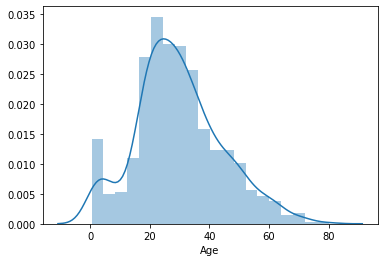

In [14]:
sns.distplot(df['Age'].dropna())

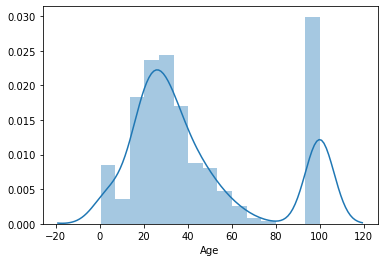

In [15]:
sns.distplot(df['Age'].fillna(100))  # we have added outlier

Text(0, 0.5, 'Number of passengers')

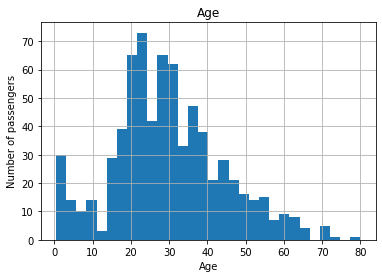

In [20]:
figure=df['Age'].hist(bins=30) # bins is used for the width of the histogram plot
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

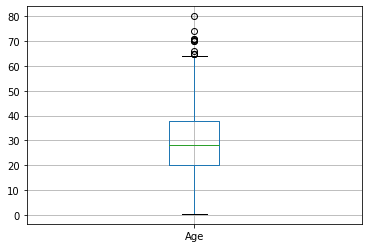

In [21]:
figure=df.boxplot(column='Age')

In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If data is Normally distributed we use this technique

In [64]:
### Assuming age follows Gaussian Distribution, we will calculate the boundaries which differentiate the outlier

upper_bound=df['Age'].mean() + 3*df['Age'].std()
lower_bound=df['Age'].mean() - 3*df['Age'].std()

In [61]:
print(lower_bound)
print(upper_bound)  # anything above 73.27 is an outlier
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


###  If Features are Skewed we use below Technique

Text(0, 0.5, 'Number of passengers')

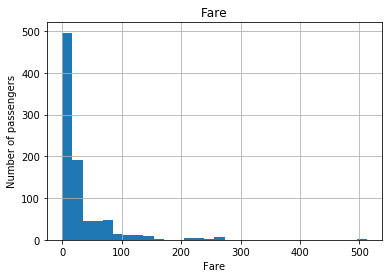

In [57]:
###  If your feature is skewed

figure=df['Fare'].hist(bins=30) # bins is used for the width of the histogram plot
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')

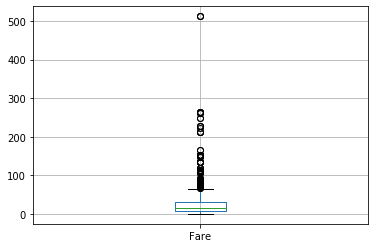

In [59]:
df.boxplot(column='Fare')

In [60]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [69]:
### Lets compute the Inter Quantile Range(IQR) to calculate the boundaries
### IQR is basically the differece between 25th percentile and the 75th percentile

iqr=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
iqr

23.0896

In [70]:
lower_bridge=df['Fare'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [71]:
# for extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(iqr*3)
upper_bridge=df['Fare'].quantile(0.75)+(iqr*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [89]:
data=df.copy()

In [95]:
data.loc[data['Age']>=73,'Age']=73

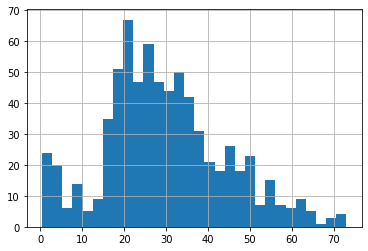

In [108]:
data['Age'].hist(bins=30)   # here we can see the maximum values is 73

In [109]:
data.loc[data['Fare']>100,'Fare']=100

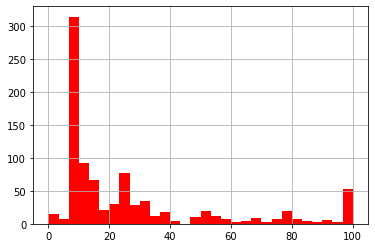

In [111]:
data['Fare'].hist(bins=30,color='r') # here we can see the maximum values are 100

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [128]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score

print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6753731343283582
roc_auc_score: 0.7139209272967235


In [130]:
### Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score

print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6343283582089553
roc_auc_score: 0.7195443851494807
